In [1]:
import mdtraj as md
import numpy as np
import os
from matplotlib import pyplot as plt



In [2]:
i = 5
path = 'run%d/'%(i)
traj = md.load_xtc('%ssys_hydro_run_pbc_promb_10.xtc'%path, top = '%ssys_hydro_run_promb.gro'%path)
xyz = traj.xyz
top = traj.topology
table, bonds = top.to_dataframe()
z_dppc = xyz[:,table.name == 'PO4',2]

z_midplane = np.mean(z_dppc, axis = 1)
z_mb_upper = np.zeros(np.shape(z_midplane))
z_mb_lower = np.zeros(np.shape(z_midplane))
z_pro_upper = np.zeros(np.shape(z_midplane))
z_pro_lower = np.zeros(np.shape(z_midplane))

for j in range(len(z_midplane)):
    temp = z_dppc[j,:]
    z_mb_upper[j] = np.mean(temp[temp>z_midplane[j]])
    z_mb_lower[j] = np.mean(temp[temp<z_midplane[j]]) 

    temp = xyz[j,table.resName != 'DPPC',2]
    z_pro_upper[j] = np.max(temp)
    z_pro_lower[j] = np.min(temp)

dt = 1e-3
t = np.arange(len(z_midplane))*dt
capture_time = np.max(t[~((z_pro_upper > z_mb_lower) & (z_pro_lower < z_mb_upper))]) + dt
print(capture_time)

3.427


In [17]:
table_pro = table[table.resName != 'DPPC']
xyz_pro = xyz[:,table.resName != 'DPPC',:]
xyz_com = np.mean(xyz_pro[:,:,:],axis=1)
xyz_helix = np.mean(xyz_pro[:,:25,:],axis=1)

for i in range(len(xyz_com)-1):
    if(xyz_com[i+1,0] - xyz_com[i,0] > 2):
        xyz_com[i+1,0] = xyz_com[i+1,0] - traj.unitcell_lengths[i+1,0]
    if(xyz_com[i+1,0] - xyz_com[i,0] < -2):
        xyz_com[i+1,0] = xyz_com[i+1,0] + traj.unitcell_lengths[i+1,0]
        
    if(xyz_com[i+1,1] - xyz_com[i,1] > 2):
        xyz_com[i+1,1] = xyz_com[i+1,1] - traj.unitcell_lengths[i+1,1]
    if(xyz_com[i+1,1] - xyz_com[i,1] < -2):
        xyz_com[i+1,1] = xyz_com[i+1,1] + traj.unitcell_lengths[i+1,1]
        
    if(xyz_com[i+1,2] - xyz_com[i,2] > 2):
        xyz_com[i+1,2] = xyz_com[i+1,2] - traj.unitcell_lengths[i+1,2]
    if(xyz_com[i+1,2] - xyz_com[i,2] < -2):
        xyz_com[i+1,2] = xyz_com[i+1,2] + traj.unitcell_lengths[i+1,2]

In [15]:
np.shape(xyz_pro)

(6001, 86, 3)

In [16]:
table_pro[table_pro.resSeq<=10]

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,BB,B,1,SER,0,
1,2,SC1,S,1,SER,0,
2,3,BB,B,2,PHE,0,
3,4,SC1,S,2,PHE,0,
4,5,SC2,S,2,PHE,0,
5,6,SC3,S,2,PHE,0,
6,7,BB,B,3,ILE,0,
7,8,SC1,S,3,ILE,0,
8,9,BB,B,4,GLU,0,
9,10,SC1,S,4,GLU,0,


In [7]:
end_to_end = np.linalg.norm(xyz_pro[:,82,:] - xyz_pro[:,0,:],axis=1)**2
mean_dist = np.sqrt(np.mean(end_to_end[:int(capture_time*1000)]))
mean_dist

1.5811117

In [41]:
xyz_com_cal = xyz_com[:int(capture_time/dt),:]
total = 1000
msd1 = np.zeros(total)
for i in range(total):
    msd1[i] = np.mean((xyz_com_cal[i+1:,0]-xyz_com_cal[:-(i+1),0])**2 + (xyz_com_cal[i+1:,1]-xyz_com_cal[:-(i+1),1])**2 + (xyz_com_cal[i+1:,2]-xyz_com_cal[:-(i+1),2])**2)

In [42]:
xyz_com_cal = xyz_com[:int(capture_time/dt),:]
total = 1000
msd2 = np.zeros(total)
for i in range(total):
    msd2[i] = np.mean((xyz_com_cal[i+1:,0]-xyz_com_cal[:-(i+1),0])**2 + (xyz_com_cal[i+1:,1]-xyz_com_cal[:-(i+1),1])**2)

In [43]:
(xyz_com_cal[i+1:,0]-xyz_com_cal[:-(i+1),0])**2 + (xyz_com_cal[i+1:,1]-xyz_com_cal[:-(i+1),1])**2

array([58.816746, 48.03723 , 51.420174, ..., 13.258591, 14.637836,
       17.323837], dtype=float32)

In [44]:
(xyz_com_cal[i+1:,0]-xyz_com_cal[:-(i+1),0])**2 + (xyz_com_cal[i+1:,1]-xyz_com_cal[:-(i+1),1])**2 + (xyz_com_cal[i+1:,2]-xyz_com_cal[:-(i+1),2])**2

array([59.25851 , 48.281567, 51.44257 , ..., 15.12785 , 19.235373,
       21.857267], dtype=float32)

(0.0, 80.0)

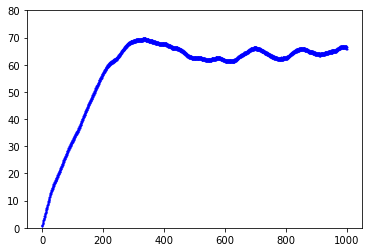

In [80]:
plt.plot(np.arange(total), msd1, 'bo', ms=1)
plt.plot(np.arange(total), msd2, 'bo', ms=1)
#plt.xlim([0,200])
plt.ylim([0,80])

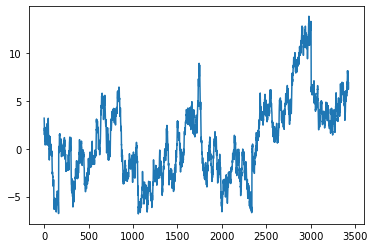

In [83]:
plt.plot(xyz_com_cal[:,0])

(0.0, 80.0)

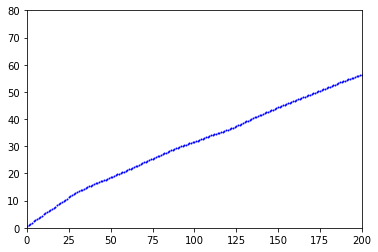

In [71]:
plt.plot(np.arange(total), msd, 'bo', ms=1)
plt.xlim([0,200])
plt.ylim([0,80])

In [3]:
plt.rcParams['font.family'] = "Helvetica"
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 2

(0.0, 24.0)

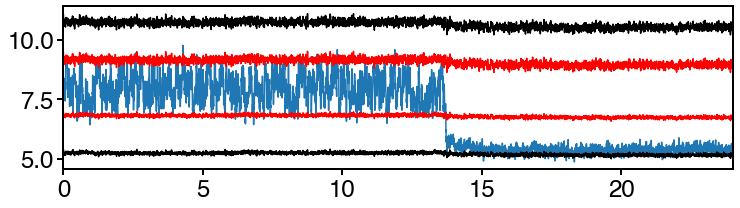

In [20]:
plt.figure(figsize=(12,3))
plt.plot(np.arange(len(xyz_com))*4/1000,xyz_com[:,2])
#plt.plot(np.arange(len(xyz_com)),z_pro_lower,'b')
#plt.plot(np.arange(len(xyz_com)),z_pro_upper,'b')
plt.plot(np.arange(len(xyz_com))*4/1000,z_mb_upper,'k')
plt.plot(np.arange(len(xyz_com))*4/1000,z_mb_lower+traj.unitcell_lengths[:,2],'k')
plt.plot(np.arange(len(xyz_com))*4/1000,z_mb_upper+mean_dist,'r')
plt.plot(np.arange(len(xyz_com))*4/1000,z_mb_lower-mean_dist+traj.unitcell_lengths[:,2],'r')

plt.xlim([0,24])

(0.0, 24.0)

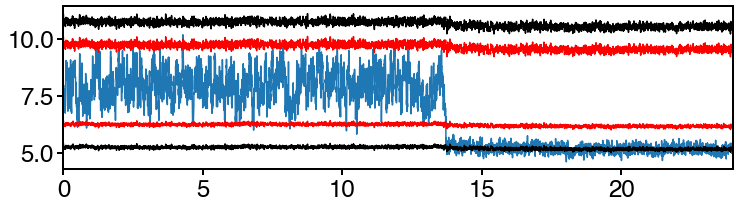

In [19]:
plt.figure(figsize=(12,3))
plt.plot(np.arange(len(xyz_helix))*4/1000,xyz_helix[:,2])
#plt.plot(np.arange(len(xyz_helix)),z_pro_lower,'b')
#plt.plot(np.arange(len(xyz_helix)),z_pro_upper,'b')
plt.plot(np.arange(len(xyz_helix))*4/1000,z_mb_upper,'k')
plt.plot(np.arange(len(xyz_helix))*4/1000,z_mb_lower+traj.unitcell_lengths[:,2],'k')
plt.plot(np.arange(len(xyz_helix))*4/1000,z_mb_upper+1,'r')
plt.plot(np.arange(len(xyz_helix))*4/1000,z_mb_lower-1+traj.unitcell_lengths[:,2],'r')
plt.xlim([0,24])

In [172]:
i = 9
path = 'run%d/'%(i)
traj = md.load_xtc('%ssys_hydro_run_pbc_promb_10.xtc'%path, top = '%ssys_hydro_run_promb.gro'%path)
xyz = traj.xyz
top = traj.topology
table, bonds = top.to_dataframe()
z_dppc = xyz[:,table.name == 'NC3',2]

z_midplane = np.mean(z_dppc, axis = 1)
z_mb_upper = np.zeros(np.shape(z_midplane))
z_mb_lower = np.zeros(np.shape(z_midplane))
z_pro_upper = np.zeros(np.shape(z_midplane))
z_pro_lower = np.zeros(np.shape(z_midplane))

for j in range(len(z_midplane)):
    temp = z_dppc[j,:]
    z_mb_upper[j] = np.mean(temp[temp>z_midplane[j]])
    z_mb_lower[j] = np.mean(temp[temp<z_midplane[j]]) 

    temp = xyz[j,table.resName != 'DPPC',2]
    z_pro_upper[j] = np.max(temp)
    z_pro_lower[j] = np.min(temp)

dt = 1e-3
t = np.arange(len(z_midplane))*dt
capture_time = np.max(t[~((z_pro_upper > z_mb_lower) & (z_pro_lower < z_mb_upper))]) + dt
print(capture_time)

2.657


In [173]:
table_pro = table[table.resName != 'DPPC']
xyz_pro = xyz[:,table.resName != 'DPPC',:]
xyz_com = np.mean(xyz_pro[:,:,:],axis=1)

for i in range(len(xyz_com)-1):
    if(xyz_com[i+1,0] - xyz_com[i,0] > 4):
        xyz_com[i+1,0] = xyz_com[i+1,0] - traj.unitcell_lengths[i+1,0]
    if(xyz_com[i+1,0] - xyz_com[i,0] < -4):
        xyz_com[i+1,0] = xyz_com[i+1,0] + traj.unitcell_lengths[i+1,0]
        
    if(xyz_com[i+1,1] - xyz_com[i,1] > 4):
        xyz_com[i+1,1] = xyz_com[i+1,1] - traj.unitcell_lengths[i+1,1]
    if(xyz_com[i+1,1] - xyz_com[i,1] < -4):
        xyz_com[i+1,1] = xyz_com[i+1,1] + traj.unitcell_lengths[i+1,1]
        
    if(xyz_com[i+1,2] - xyz_com[i,2] > 4):
        xyz_com[i+1,2] = xyz_com[i+1,2] - traj.unitcell_lengths[i+1,2]
    if(xyz_com[i+1,2] - xyz_com[i,2] < -4):
        xyz_com[i+1,2] = xyz_com[i+1,2] + traj.unitcell_lengths[i+1,2]

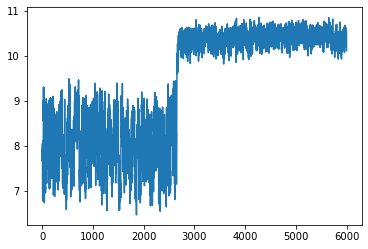

In [174]:
plt.plot(np.arange(len(xyz_com)),xyz_com[:,2])